In [1]:
import warnings
warnings.filterwarnings('ignore')

### Import lib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Physical constants

In [3]:
hbar = sp.constants.hbar
m = sp.constants.electron_mass
eV = sp.constants.electron_volt

### Transmission probability calculator

In [4]:
def T_fn(V0, E, L):
  V0_ev = V0 * eV
  E_ev = E * eV
  k1_sq = (2*m*E_ev) / (hbar**2)
  k1 = np.sqrt(k1_sq)

  k2_sq = ((2*m) * (V0_ev-E_ev)) / (hbar**2)
  k2 = np.sqrt(k2_sq)

  gamma = (k1_sq-k2_sq) / (k1*k2)
  gamma_sq = gamma**2

  cosh_sq = np.pow(np.cosh(k2*L), 2)
  sinh_sq = np.pow(np.sinh(k2*L), 2)

  T_list = 1/(cosh_sq + (gamma_sq/4)*sinh_sq)

  return T_list

### Transmission probability (T) vs Barrier width (L)

#### Parameters

In [5]:
V0 = 1
E = 0.7
L_list = np.linspace(1e-12, 20e-9, 1000000)

In [6]:
T = T_fn(V0, E, L_list)

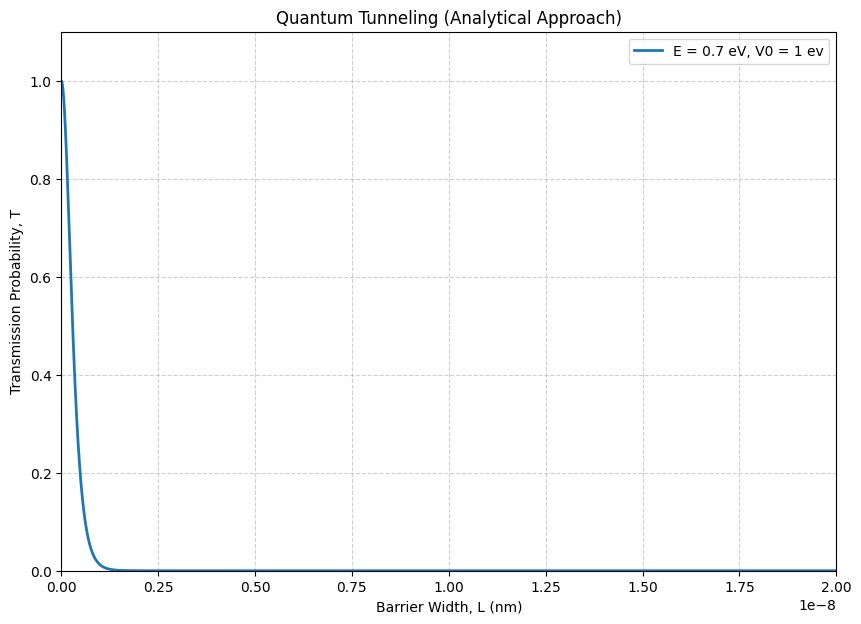

In [7]:
plt.figure(figsize=(10, 7))
plt.plot(L_list, T, label=f'E = {E} eV, V0 = {V0} ev', lw=2)

plt.title('Quantum Tunneling (Analytical Approach)')
plt.xlabel('Barrier Width, L (nm)')
plt.ylabel('Transmission Probability, T')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(0, 1.1)
plt.xlim(0, L_list.max())
plt.savefig('analytical_T_L.png', dpi=200)

### Transmission probability (T) vs Barrier height (V0)

#### Parameters

In [8]:
E = 0.7
V0_list = np.linspace(E+1e-12, 20, 1000000)
L = 1e-10

In [9]:
T = T_fn(V0_list, E, L)

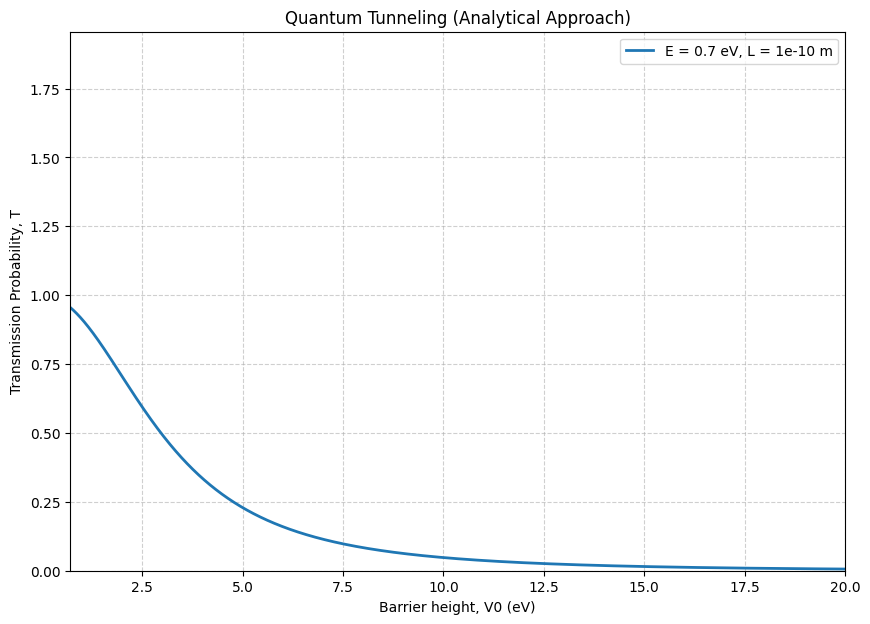

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(V0_list, T, label=f'E = {E} eV, L = {L} m', lw=2)

plt.title('Quantum Tunneling (Analytical Approach)')
plt.xlabel('Barrier height, V0 (eV)')
plt.ylabel('Transmission Probability, T')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(0, T.max()+1)
plt.xlim(V0_list.min(), V0_list.max())
plt.savefig('analytical_T_V0.png', dpi=200)

### Transmission probability (T) vs Incident particle energy (E)

#### Parameters

In [11]:
V0 = 1
E_list = np.linspace(0, V0-1e-12, 1000000)
L = 1e-10

In [12]:
T = T_fn(V0, E_list, L)

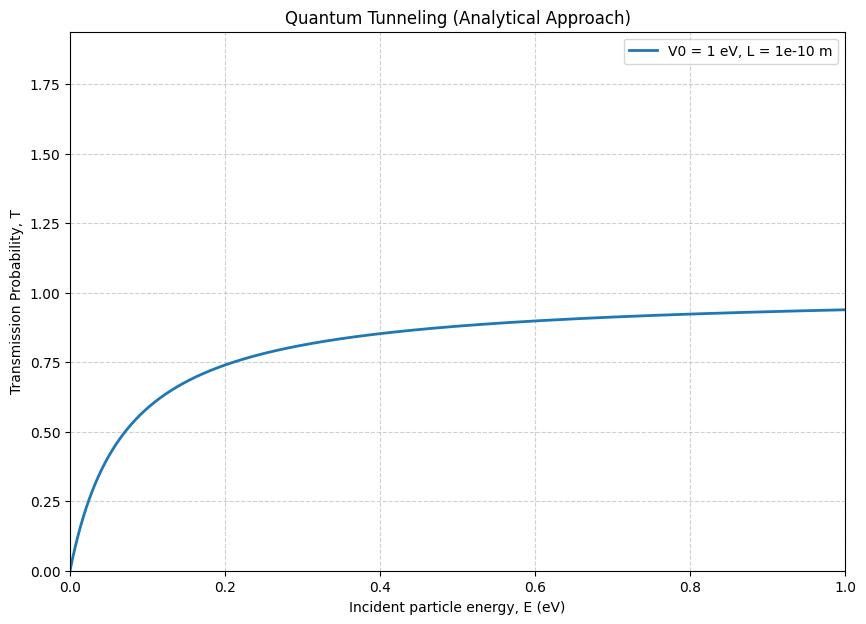

In [13]:
plt.figure(figsize=(10, 7))
plt.plot(E_list, T, label=f'V0 = {V0} eV, L = {L} m', lw=2)

plt.title('Quantum Tunneling (Analytical Approach)')
plt.xlabel('Incident particle energy, E (eV)')
plt.ylabel('Transmission Probability, T')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(0, T.max()+1)
plt.xlim(E_list.min(), E_list.max())
plt.savefig('analytical_T_E.png', dpi=200)